In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf

%matplotlib inline
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
def read_data(file_path):
    column_names = ['user-id','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
    data = pd.read_csv(file_path,header = None, names = column_names)
    return data

def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 10), sharex = True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def windows(data, size):
    start = 0
    while start < data.count():
        yield int(start), int(start + size)
        start += (size / 2)

def segment_signal(data,window_size = 90):
    segments = np.empty((0,window_size,3))
    labels = np.empty((0))
    for (start, end) in windows(data['timestamp'], window_size):
        x = data["x-axis"][start:end]
        y = data["y-axis"][start:end]
        z = data["z-axis"][start:end]
        if(len(dataset['timestamp'][start:end]) == window_size):
            segments = np.vstack([segments,np.dstack([x,y,z])])
            labels = np.append(labels,stats.mode(data["activity"][start:end])[0][0])
    return segments, labels

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)

def depthwise_conv2d(x, W):
    return tf.nn.depthwise_conv2d(x,W, [1, 1, 1, 1], padding='VALID')

def apply_depthwise_conv(x,kernel_size,num_channels,depth):
    weights = weight_variable([1, kernel_size, num_channels, depth])
    biases = bias_variable([depth * num_channels])
    return tf.nn.relu(tf.add(depthwise_conv2d(x, weights),biases))
    
def apply_max_pool(x,kernel_size,stride_size):
    return tf.nn.max_pool(x, ksize=[1, 1, kernel_size, 1], 
                          strides=[1, 1, stride_size, 1], padding='VALID')

In [3]:
dataset = read_data('actitracker_raw2.txt')
dataset['x-axis'] = feature_normalize(dataset['x-axis'])
dataset['y-axis'] = feature_normalize(dataset['y-axis'])
dataset['z-axis'] = feature_normalize(dataset['z-axis'])

TypeError: must be str, not int

In [4]:
dataset = dataset.replace(";","",regex=True)#.replace(';',',')

In [5]:
dataset

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.198203,0.804142,0.50395286
1,33,Jogging,49106062271000,0.635039,0.594170,0.95342433
2,33,Jogging,49106112167000,0.619130,0.537639,-0.08172209
3,33,Jogging,49106222305000,-0.186271,1.666240,3.0237172
4,33,Jogging,49106332290000,-0.269795,0.719346,7.205164
5,33,Jogging,49106442306000,0.104071,-1.444986,-6.510526
6,33,Jogging,49106542312000,-0.186271,0.491202,5.706926
7,33,Jogging,49106652389000,-0.170362,0.991906,7.0553403
8,33,Jogging,49106762313000,-1.327754,0.616378,5.134871
9,33,Jogging,49106872299000,0.042423,-0.871599,1.6480621


In [6]:
dataset['z-axis']

0           0.50395286
1           0.95342433
2          -0.08172209
3            3.0237172
4             7.205164
5            -6.510526
6             5.706926
7            7.0553403
8             5.134871
9            1.6480621
10           2.7240696
11            2.982856
12         -0.29964766
13           -8.158588
14            8.539958
15           2.9147544
16          -1.4573772
17            9.425281
18           -10.18802
19           -9.724928
20           1.5390993
21            3.718355
22          0.08172209
23            6.510526
24           -4.630918
25           13.525005
26           6.1700177
27           4.0180025
28           2.3699405
29           4.7126403
              ...     
1098174           2.22
1098175           2.26
1098176           2.18
1098177           2.26
1098178           2.41
1098179            2.3
1098180           2.26
1098181           2.34
1098182           2.41
1098183           2.37
1098184           2.37
1098185           2.45
1098186    

TypeError: unsupported operand type(s) for -: 'float' and 'str'

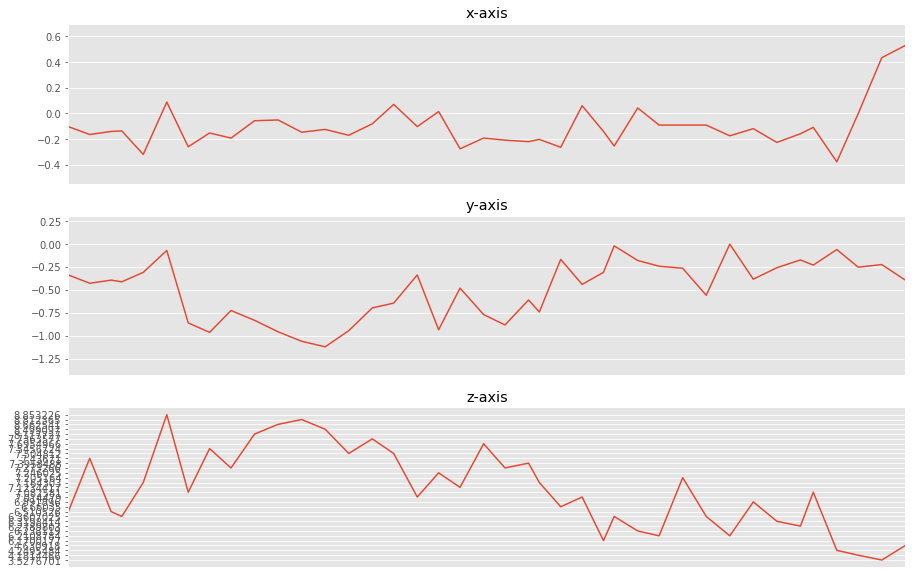

In [7]:
for activity in np.unique(dataset["activity"]):
    subset = dataset[dataset["activity"] == activity][:40]
    plot_activity(activity,subset)

In [8]:
segments, labels = segment_signal(dataset)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int8)
reshaped_segments = segments.reshape(len(segments), 1,90, 3)

/home/deepstation/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [9]:
train_test_split = np.random.rand(len(reshaped_segments)) < 0.70

train_x = reshaped_segments[train_test_split]
train_y = labels[train_test_split]
test_x = reshaped_segments[~train_test_split]
test_y = labels[~train_test_split]

In [14]:
#parameter

input_height = 1
input_width = 90
num_labels = 6
num_channels = 3

batch_size = 10
kernel_size = 60
depth = 60
num_hidden = 10000

learning_rate = 1e-5
training_epochs = 300

total_batches = train_x.shape[0] // batch_size

In [15]:
#archtecture

X = tf.placeholder(tf.float32, shape=[None,input_height,input_width,num_channels])
Y = tf.placeholder(tf.float32, shape=[None,num_labels])

c = apply_depthwise_conv(X,kernel_size,num_channels,depth)
p = apply_max_pool(c,20,2)
c = apply_depthwise_conv(p,6,depth*num_channels,depth//10)

shape = c.get_shape().as_list()
c_flat = tf.reshape(c, [-1, shape[1] * shape[2] * shape[3]])

f_weights_l1 = weight_variable([shape[1] * shape[2] * depth * num_channels * (depth//10), num_hidden])
f_biases_l1 = bias_variable([num_hidden])
f = tf.nn.tanh(tf.add(tf.matmul(c_flat, f_weights_l1),f_biases_l1))

out_weights = weight_variable([num_hidden, num_labels])
out_biases = bias_variable([num_labels])
y_ = tf.nn.softmax(tf.matmul(f, out_weights) + out_biases)

In [16]:
loss = -tf.reduce_sum(Y * tf.log(y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
with tf.Session() as session:
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs):
        cost_history = np.empty(shape=[1],dtype=float)
        for b in range(total_batches):    
            offset = (b * batch_size) % (train_y.shape[0] - batch_size)
            batch_x = train_x[offset:(offset + batch_size), :, :, :]
            batch_y = train_y[offset:(offset + batch_size), :]
            _, c = session.run([optimizer, loss],feed_dict={X: batch_x, Y : batch_y})
            cost_history = np.append(cost_history,c)
            
        print("Epoch: ",epoch," Training Loss: ",c," Training Accuracy: ",
              session.run(accuracy, feed_dict={X: train_x, Y: train_y}))
        summary_writer = tf.summary.FileWriter('/home/deepstation/PRMLlab/technicakidz/github.com/Human-Activity-Recognition-using-CNN/wisdm_data', graph = session.graph)
        
    print("Testing Accuracy:", session.run(accuracy, feed_dict={X: test_x, Y: test_y}))

Epoch:  0  Training Loss:  9.89441  Training Accuracy:  0.691603
Epoch:  1  Training Loss:  6.68674  Training Accuracy:  0.759953
Epoch:  2  Training Loss:  5.45852  Training Accuracy:  0.777158
Epoch:  3  Training Loss:  4.93679  Training Accuracy:  0.792249
Epoch:  4  Training Loss:  4.69488  Training Accuracy:  0.802172
Epoch:  5  Training Loss:  4.55747  Training Accuracy:  0.808397
Epoch:  6  Training Loss:  4.46929  Training Accuracy:  0.814093
Epoch:  7  Training Loss:  4.40444  Training Accuracy:  0.818966
Epoch:  8  Training Loss:  4.34063  Training Accuracy:  0.82384
Epoch:  9  Training Loss:  4.28217  Training Accuracy:  0.827774
Epoch:  10  Training Loss:  4.22599  Training Accuracy:  0.831532
Epoch:  11  Training Loss:  4.17432  Training Accuracy:  0.836171
Epoch:  12  Training Loss:  4.11211  Training Accuracy:  0.839401
Epoch:  13  Training Loss:  4.05307  Training Accuracy:  0.8431
Epoch:  14  Training Loss:  3.99019  Training Accuracy:  0.846095
Epoch:  15  Training Lo

Epoch:  125  Training Loss:  1.16705  Training Accuracy:  0.935056
Epoch:  126  Training Loss:  1.15766  Training Accuracy:  0.935056
Epoch:  127  Training Loss:  1.1487  Training Accuracy:  0.935056
Epoch:  128  Training Loss:  1.13936  Training Accuracy:  0.93529
Epoch:  129  Training Loss:  1.13068  Training Accuracy:  0.935643
Epoch:  130  Training Loss:  1.12175  Training Accuracy:  0.936054
Epoch:  131  Training Loss:  1.11318  Training Accuracy:  0.936347
Epoch:  132  Training Loss:  1.10443  Training Accuracy:  0.936582
Epoch:  133  Training Loss:  1.09533  Training Accuracy:  0.936817
Epoch:  134  Training Loss:  1.08752  Training Accuracy:  0.937228
Epoch:  135  Training Loss:  1.0794  Training Accuracy:  0.937639
Epoch:  136  Training Loss:  1.0716  Training Accuracy:  0.938109
Epoch:  137  Training Loss:  1.06386  Training Accuracy:  0.938461
Epoch:  138  Training Loss:  1.05507  Training Accuracy:  0.938755
Epoch:  139  Training Loss:  1.04572  Training Accuracy:  0.938814

Epoch:  247  Training Loss:  0.512437  Training Accuracy:  0.956723
Epoch:  248  Training Loss:  0.510405  Training Accuracy:  0.956782
Epoch:  249  Training Loss:  0.507865  Training Accuracy:  0.957017
Epoch:  250  Training Loss:  0.505165  Training Accuracy:  0.957193
Epoch:  251  Training Loss:  0.502976  Training Accuracy:  0.95731
Epoch:  252  Training Loss:  0.500306  Training Accuracy:  0.957486
Epoch:  253  Training Loss:  0.498129  Training Accuracy:  0.957721
Epoch:  254  Training Loss:  0.495511  Training Accuracy:  0.957839
Epoch:  255  Training Loss:  0.49363  Training Accuracy:  0.958015
Epoch:  256  Training Loss:  0.490975  Training Accuracy:  0.958191
Epoch:  257  Training Loss:  0.488544  Training Accuracy:  0.958367
Epoch:  258  Training Loss:  0.486005  Training Accuracy:  0.958367
Epoch:  259  Training Loss:  0.483464  Training Accuracy:  0.958602
Epoch:  260  Training Loss:  0.480772  Training Accuracy:  0.958837
Epoch:  261  Training Loss:  0.477614  Training Ac